Business Forecasting Project - Group 1

Akhil Kochukaleeckal Raju

Albin Samuel

Chetana Chandrashekara

Clevin Nambadan Jaison

Vedant Deshpande

1.Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.stattools import coint
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error

2. Loading the dataset

In [5]:
url = "https://github.com/Cnj31/Business-Forecasting/raw/refs/heads/main/Forecasting%20Dataset.xlsx"
df = pd.read_excel(url)

In [6]:
df.head()

,Date,Nominal_Exchange_Rate,Real_Exchange_Rate,CPI_Kuwait,CPI_US
0,2013-01-01,3.5423,3.538781,100.220823,100.121257
1,2013-02-01,3.5209,3.513908,100.442134,100.242662
2,2013-03-01,3.5013,3.490875,100.663933,100.364214
3,2013-04-01,3.5146,3.500654,100.886222,100.485913
4,2013-05-01,3.4914,3.474092,101.109002,100.607759


3. Log transforming the variables

In [8]:
df['log_Nominal_Exchange_Rate'] = np.log(df['Nominal_Exchange_Rate'])
df['log_Real_Exchange_Rate'] = np.log(df['Real_Exchange_Rate'])
df['log_CPI_Kuwait'] = np.log(df['CPI_Kuwait'])
df['log_CPI_US'] = np.log(df['CPI_US'])

In [9]:
df.head()

,Date,Nominal_Exchange_Rate,Real_Exchange_Rate,CPI_Kuwait,CPI_US,log_Nominal_Exchange_Rate,log_Real_Exchange_Rate,log_CPI_Kuwait,log_CPI_US
0,2013-01-01,3.5423,3.538781,100.220823,100.121257,1.264776,1.263782,4.607376,4.606382
1,2013-02-01,3.5209,3.513908,100.442134,100.242662,1.258717,1.256729,4.609582,4.607594
2,2013-03-01,3.5013,3.490875,100.663933,100.364214,1.253134,1.250152,4.611788,4.608806
3,2013-04-01,3.5146,3.500654,100.886222,100.485913,1.256926,1.252950,4.613993,4.610018
4,2013-05-01,3.4914,3.474092,101.109002,100.607759,1.250303,1.245333,4.616199,4.611229


4. Times series plots for the log variables

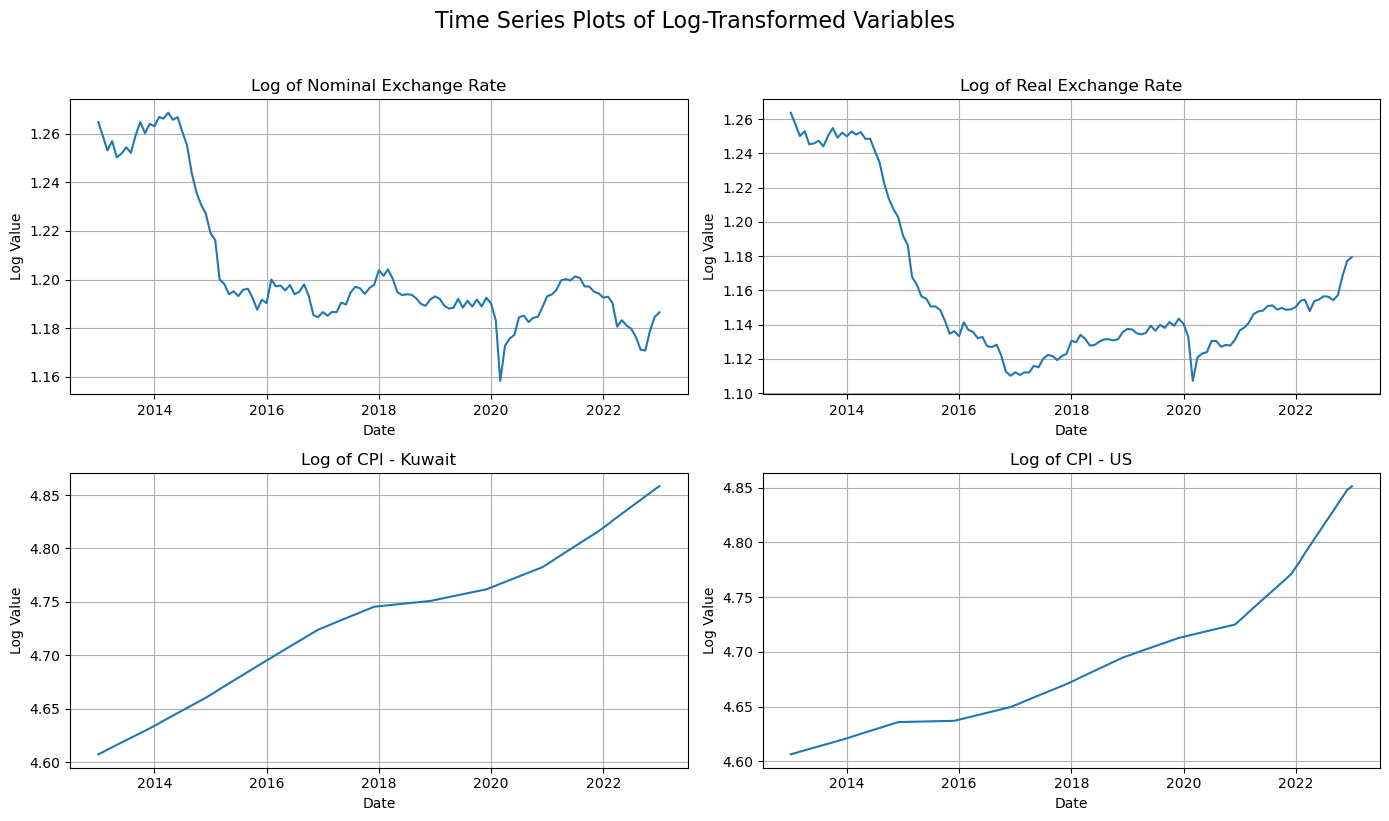

In [11]:
variables = {
    'log_Nominal_Exchange_Rate': 'Log of Nominal Exchange Rate',
    'log_Real_Exchange_Rate': 'Log of Real Exchange Rate',
    'log_CPI_Kuwait': 'Log of CPI - Kuwait',
    'log_CPI_US': 'Log of CPI - US'
}

plt.figure(figsize=(14, 8))
for i, (col, title) in enumerate(variables.items(), 1):
    plt.subplot(2, 2, i)
    plt.plot(df['Date'], df[col], label=title)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Log Value')
    plt.grid(True)
    plt.tight_layout()

plt.suptitle("Time Series Plots of Log-Transformed Variables", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

5. Analysing the properties of log variables - summary statistics

In [13]:
# Selecting the log-transformed columns in df
log_cols = [
    'log_Nominal_Exchange_Rate',
    'log_Real_Exchange_Rate',
    'log_CPI_Kuwait',
    'log_CPI_US'
]

# Descriptive statistics
summary_stats = df[log_cols].describe().T

# skewness and kurtosis
summary_stats['Skewness'] = df[log_cols].skew()
summary_stats['Kurtosis'] = df[log_cols].kurtosis()

# summary table
summary_stats

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
log_Nominal_Exchange_Rate,121.0,1.204055,0.027493,1.158358,1.188758,1.193983,1.200657,1.268608,1.330670,0.436043
log_Real_Exchange_Rate,121.0,1.159026,0.045150,1.107168,1.130447,1.140391,1.163310,1.263782,1.240275,0.095395
log_CPI_Kuwait,121.0,4.731652,0.066056,4.607376,4.679093,4.745928,4.773885,4.858231,-0.140931,-0.807411
log_CPI_US,121.0,4.686623,0.061777,4.606382,4.636496,4.672615,4.719848,4.851214,0.885643,0.053462


6. ADF Testing to check Stationarity of the Log Variables

In [15]:
# List of the variables that needs to be tested
log_cols = [
    'log_Nominal_Exchange_Rate',
    'log_Real_Exchange_Rate',
    'log_CPI_Kuwait',
    'log_CPI_US'
]

# ADF-Test function
def run_adf(series, name):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")
    if result[1] < 0.05:
        print("Conclusion: Stationary")
    else:
        print("Conclusion: Non-Stationary")

# Running ADF test for each variable
for col in log_cols:
    run_adf(df[col], col)


ADF Test for log_Nominal_Exchange_Rate
ADF Statistic: -2.2891
p-value: 0.1755
Critical Value (1%): -3.4891
Critical Value (5%): -2.8872
Critical Value (10%): -2.5805
Conclusion: Non-Stationary

ADF Test for log_Real_Exchange_Rate
ADF Statistic: -2.1340
p-value: 0.2311
Critical Value (1%): -3.4891
Critical Value (5%): -2.8872
Critical Value (10%): -2.5805
Conclusion: Non-Stationary

ADF Test for log_CPI_Kuwait
ADF Statistic: -0.2352
p-value: 0.9342
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
Conclusion: Non-Stationary

ADF Test for log_CPI_US
ADF Statistic: 1.0712
p-value: 0.9950
Critical Value (1%): -3.4865
Critical Value (5%): -2.8862
Critical Value (10%): -2.5799
Conclusion: Non-Stationary


7. Since all resulted as Non stationary , going for first differencing

In [17]:
# First differencing of log-transformed variables
df['d_log_Nominal_Exchange_Rate'] = df['log_Nominal_Exchange_Rate'].diff()
df['d_log_Real_Exchange_Rate'] = df['log_Real_Exchange_Rate'].diff()
df['d_log_CPI_Kuwait'] = df['log_CPI_Kuwait'].diff()
df['d_log_CPI_US'] = df['log_CPI_US'].diff()

# Dropping the first row (NaNs from differencing)
df_diff = df.dropna().reset_index(drop=True)

In [18]:
df.head()

,Date,Nominal_Exchange_Rate,Real_Exchange_Rate,CPI_Kuwait,CPI_US,log_Nominal_Exchange_Rate,log_Real_Exchange_Rate,log_CPI_Kuwait,log_CPI_US,d_log_Nominal_Exchange_Rate,d_log_Real_Exchange_Rate,d_log_CPI_Kuwait,d_log_CPI_US
0,2013-01-01,3.5423,3.538781,100.220823,100.121257,1.264776,1.263782,4.607376,4.606382,NaN,NaN,NaN,NaN
1,2013-02-01,3.5209,3.513908,100.442134,100.242662,1.258717,1.256729,4.609582,4.607594,-0.006060,-0.007054,0.002206,0.001212
2,2013-03-01,3.5013,3.490875,100.663933,100.364214,1.253134,1.250152,4.611788,4.608806,-0.005582,-0.006576,0.002206,0.001212
3,2013-04-01,3.5146,3.500654,100.886222,100.485913,1.256926,1.252950,4.613993,4.610018,0.003791,0.002797,0.002206,0.001212
4,2013-05-01,3.4914,3.474092,101.109002,100.607759,1.250303,1.245333,4.616199,4.611229,-0.006623,-0.007617,0.002206,0.001212


8. ADF Test with first differencing

In [20]:
# List of first-differenced log variables
diff_cols = [
    'd_log_Nominal_Exchange_Rate',
    'd_log_Real_Exchange_Rate',
    'd_log_CPI_Kuwait',
    'd_log_CPI_US'
]

# Function to run ADF test and print results
def run_adf(series, name):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")
    if result[1] < 0.05:
        print("Conclusion: Stationary")
    else:
        print("Conclusion: Non-Stationary")

# Applying ADF test to each column
for col in diff_cols:
    run_adf(df_diff[col], col)


ADF Test for d_log_Nominal_Exchange_Rate
ADF Statistic: -6.3363
p-value: 0.0000
Critical Value (1%): -3.4870
Critical Value (5%): -2.8864
Critical Value (10%): -2.5800
Conclusion: Stationary

ADF Test for d_log_Real_Exchange_Rate
ADF Statistic: -2.1100
p-value: 0.2405
Critical Value (1%): -3.4891
Critical Value (5%): -2.8872
Critical Value (10%): -2.5805
Conclusion: Non-Stationary

ADF Test for d_log_CPI_Kuwait
ADF Statistic: -2.3112
p-value: 0.1684
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
Conclusion: Non-Stationary

ADF Test for d_log_CPI_US
ADF Statistic: -1.4552
p-value: 0.5555
Critical Value (1%): -3.4865
Critical Value (5%): -2.8862
Critical Value (10%): -2.5799
Conclusion: Non-Stationary


9. Since three variables are still non stationary , going for second differencing because atleast we need to get the real exhange rate as stationary as it is our target variable that needs to be forecasted.

In [22]:
# Creating second-differenced variables
df['dd_log_Real_Exchange_Rate'] = df['d_log_Real_Exchange_Rate'].diff()
df['dd_log_CPI_Kuwait'] = df['d_log_CPI_Kuwait'].diff()
df['dd_log_CPI_US'] = df['d_log_CPI_US'].diff()

# Dropping the first row (NaNs introduced by second differencing)
df_second_diff = df.dropna().reset_index(drop=True)

In [23]:
df.head()

,Date,Nominal_Exchange_Rate,Real_Exchange_Rate,CPI_Kuwait,CPI_US,log_Nominal_Exchange_Rate,log_Real_Exchange_Rate,log_CPI_Kuwait,log_CPI_US,d_log_Nominal_Exchange_Rate,d_log_Real_Exchange_Rate,d_log_CPI_Kuwait,d_log_CPI_US,dd_log_Real_Exchange_Rate,dd_log_CPI_Kuwait,dd_log_CPI_US
0,2013-01-01,3.5423,3.538781,100.220823,100.121257,1.264776,1.263782,4.607376,4.606382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-02-01,3.5209,3.513908,100.442134,100.242662,1.258717,1.256729,4.609582,4.607594,-0.006060,-0.007054,0.002206,0.001212,NaN,NaN,NaN
2,2013-03-01,3.5013,3.490875,100.663933,100.364214,1.253134,1.250152,4.611788,4.608806,-0.005582,-0.006576,0.002206,0.001212,0.000477,0.000000e+00,-8.881784e-16
3,2013-04-01,3.5146,3.500654,100.886222,100.485913,1.256926,1.252950,4.613993,4.610018,0.003791,0.002797,0.002206,0.001212,0.009374,8.881784e-16,0.000000e+00
4,2013-05-01,3.4914,3.474092,101.109002,100.607759,1.250303,1.245333,4.616199,4.611229,-0.006623,-0.007617,0.002206,0.001212,-0.010414,-8.881784e-16,8.881784e-16


10. ADF Test with second differencing

In [25]:
# Columns to test
columns_to_test = [
    'd_log_Nominal_Exchange_Rate',           # Already stationary
    'dd_log_Real_Exchange_Rate',
    'dd_log_CPI_Kuwait',
    'dd_log_CPI_US'
]

# Function to run ADF test and print results
def run_adf(series, name):
    result = adfuller(series.dropna())
    print(f"\nADF Test for {name}")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value:.4f}")
    if result[1] < 0.05:
        print("Conclusion: Stationary")
    else:
        print("Conclusion: Non-Stationary")

# Running ADF test for all selected variables
for col in columns_to_test:
    run_adf(df_second_diff[col], col)


ADF Test for d_log_Nominal_Exchange_Rate
ADF Statistic: -6.1274
p-value: 0.0000
Critical Value (1%): -3.4875
Critical Value (5%): -2.8866
Critical Value (10%): -2.5801
Conclusion: Stationary

ADF Test for dd_log_Real_Exchange_Rate
ADF Statistic: -9.1230
p-value: 0.0000
Critical Value (1%): -3.4891
Critical Value (5%): -2.8872
Critical Value (10%): -2.5805
Conclusion: Stationary

ADF Test for dd_log_CPI_Kuwait
ADF Statistic: -1.6874
p-value: 0.4376
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
Conclusion: Non-Stationary

ADF Test for dd_log_CPI_US
ADF Statistic: -8.7451
p-value: 0.0000
Critical Value (1%): -3.4870
Critical Value (5%): -2.8864
Critical Value (10%): -2.5800
Conclusion: Stationary


11. CPI Kuwait is still non stationary , so going for trend augmented ADF testing

In [27]:
# Applying ADF test with trend (regression='ct')
result = adfuller(df['log_CPI_Kuwait'].dropna(), regression='ct')

# Print results
print("ADF Test with Trend for log_CPI_Kuwait")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")
print("Conclusion:", "Stationary" if result[1] < 0.05 else "Non-Stationary")

ADF Test with Trend for log_CPI_Kuwait
ADF Statistic: -3.4303
p-value: 0.0475
Critical Value (1%): -4.0460
Critical Value (5%): -3.4523
Critical Value (10%): -3.1516
Conclusion: Stationary


12. The results indicate that while the log CPI series was non-stationary under the standard ADF test, it becomes stationary when a linear trend is included. The p-value fell below the 10% significance threshold, suggesting that the series is trend-stationary. This means that the CPI fluctuates around a deterministic upward trend rather than having a unit root.

13. All Log variables have now become stationary in atleast one way, hence proceeding for PPP testings

14. Testing for Absolute PPP validity

In [31]:
# Creating the price differential
df['price_diff'] = df['log_CPI_Kuwait'] - df['log_CPI_US']

# Setting up and run regression
X = sm.add_constant(df['price_diff'])
y = df['log_Nominal_Exchange_Rate']  # <- corrected name

model = sm.OLS(y, X).fit()

# Output regression summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     log_Nominal_Exchange_Rate   R-squared:                       0.426
Model:                                   OLS   Adj. R-squared:                  0.421
Method:                        Least Squares   F-statistic:                     88.42
Date:                       Thu, 20 Nov 2025   Prob (F-statistic):           4.85e-16
Time:                               11:37:10   Log-Likelihood:                 297.28
No. Observations:                        121   AIC:                            -590.6
Df Residuals:                            119   BIC:                            -585.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

15. Testing for Relative PPP validity

In [33]:
# Creating inflation differential
df['inflation_diff'] = df['d_log_CPI_Kuwait'] - df['d_log_CPI_US']

# Dropping rows with any NaNs
df_clean = df[['d_log_Nominal_Exchange_Rate', 'inflation_diff']].dropna()

# Setting up regression
X = sm.add_constant(df_clean['inflation_diff'])  # add intercept
y = df_clean['d_log_Nominal_Exchange_Rate']      # exchange rate change

# Running regression
model = sm.OLS(y, X).fit()

# Shows summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     d_log_Nominal_Exchange_Rate   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                  0.005
Method:                          Least Squares   F-statistic:                     1.647
Date:                         Thu, 20 Nov 2025   Prob (F-statistic):              0.202
Time:                                 11:37:10   Log-Likelihood:                 471.87
No. Observations:                          120   AIC:                            -939.7
Df Residuals:                              118   BIC:                            -934.2
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

16. Cointegration Test

In [35]:
# Extracting relevant log-transformed series
log_NER = df['log_Nominal_Exchange_Rate'].dropna()
log_CPI_Kuwait = df['log_CPI_Kuwait'].dropna()
log_CPI_US = df['log_CPI_US'].dropna()

# Aligning series and calculate CPI differential
log_CPI_diff = log_CPI_Kuwait - log_CPI_US
log_NER_aligned, log_CPI_diff_aligned = log_NER.align(log_CPI_diff, join='inner')

# Performing Engle-Granger cointegration test
coint_stat, p_value, critical_values = coint(log_NER_aligned, log_CPI_diff_aligned)

# Display results
print("Engle-Granger Cointegration Test Results:")
print(f"Test Statistic: {coint_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("Critical Values:")
for level, value in zip(['1%', '5%', '10%'], critical_values):
    print(f"  {level}: {value:.4f}")

# Interpretation note
if p_value < 0.05:
    print("Result: Significant cointegration → long-run relationship exists (supports PPP).")
else:
    print("Result: No cointegration → long-run PPP relationship not statistically supported.")

Engle-Granger Cointegration Test Results:
Test Statistic: -2.2733
P-value: 0.3870
Critical Values:
  1%: -3.9900
  5%: -3.3875
  10%: -3.0800
Result: No cointegration → long-run PPP relationship not statistically supported.


17. The lack of cointegration suggests that long-run PPP does not hold in this context. This finding implies that price differentials between Kuwait and the US do not reliably predict changes in the nominal exchange rate over the long term, which is consistent with the instability observed in real-world exchange rates and inflation dynamics.

18. The Absolute PPP test shows a statistically significant relationship, but the coefficient is negative and far from the theoretical value of 1, indicating that Absolute PPP does not hold in this context.
The Relative PPP test also fails to validate the theory, as the inflation differential had a statistically insignificant effect on exchange rate changes.

19. Modeling and Forecasting

20. Selection of possible combinations of ARIMA (p, d , q) , d = 2 as we got the real exchange rate stationary at the second differencing.

21. ACF and PACF Plotting

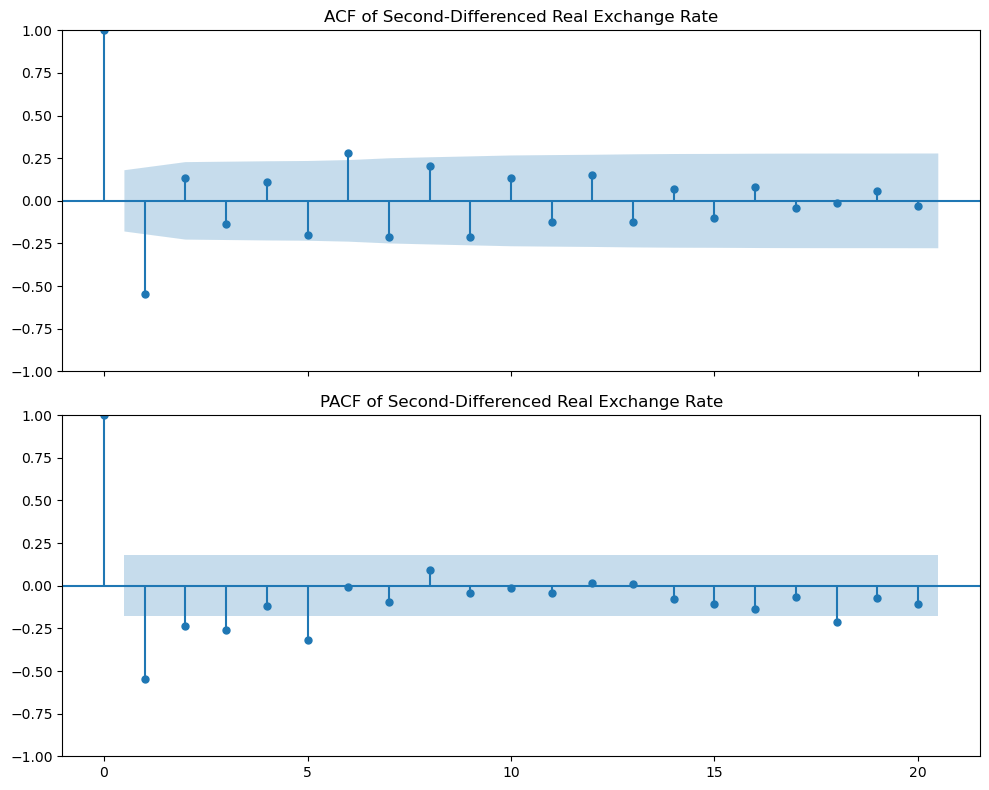

In [41]:
# Extracting and cleaning the second-differenced real exchange rate series
real_rer_series = df_second_diff['dd_log_Real_Exchange_Rate'].dropna()

# Plotting ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ACF plot for q (moving average terms)
plot_acf(real_rer_series, ax=axes[0], lags=20)
axes[0].set_title("ACF of Second-Differenced Real Exchange Rate")

# PACF plot for p (autoregressive terms)
plot_pacf(real_rer_series, ax=axes[1], lags=20)
axes[1].set_title("PACF of Second-Differenced Real Exchange Rate")

# plots diagram
plt.tight_layout()
plt.show()

22. ACF (Autocorrelation Function):

The ACF plot shows a significant spike at lag 1, followed by a rapid decay. This pattern suggests the presence of a short memory moving average component, making q = 1 or 2 a reasonable choice.

PACF (Partial Autocorrelation Function):

The PACF plot also displays a strong spike at lag 1, and a smaller drop-off around lag 2. This indicates an autoregressive component may be present, suggesting p = 1 or 2 are viable options.

Based on these results , we are proceeding with the following ARIMA models

ARIMA(1,2,0)

ARIMA(0,2,1)

ARIMA(1,2,1)

ARIMA(2,2,1)

ARIMA(1,2,2)

ARIMA(2,2,2)

23. Tests to select the best model among the six models : 

Statistical Significance of Parameters (p-values from z/t-statistics)

Residual Testing - Q test

Akaike Information Criterion (AIC) Test

Bayesian Information Criterion (BIC) Test

24. Statistical Significance of Parameters (p-values from z/t-statistics)

In [45]:
real_rer_series = df['log_Real_Exchange_Rate'].dropna()

# List of ARIMA(p,d,q) models to evaluate
model_configs = [(1,2,0), (0,2,1), (1,2,1), (2,2,1), (1,2,2), (2,2,2)]

# Loop through each model
for order in model_configs:
    print(f"\n=== Model: ARIMA{order} ===")
    try:
        model = ARIMA(real_rer_series, order=order)
        result = model.fit()
        
        # Get the coefficient table
        summary_df = result.summary().tables[1].as_html()
        coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]
        
        # Print each parameter's result
        for param in coef_df.index:
            coef = coef_df.loc[param, 'coef']
            pval = coef_df.loc[param, 'P>|z|']
            signif = "Significant" if pval < 0.05 else "Insignificant"
            print(f"{param}: Coefficient = {coef:.4f}, p-value = {pval:.4f} {signif}")
    
    except Exception as e:
        print(f"Failed to fit model ARIMA{order}: {e}")


=== Model: ARIMA(1, 2, 0) ===


C:\Users\smart\AppData\Local\Temp\ipykernel_7696\3277098978.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]


ar.L1: Coefficient = -0.5511, p-value = 0.0000 Significant
sigma2: Coefficient = 0.0000, p-value = 0.0000 Significant

=== Model: ARIMA(0, 2, 1) ===


C:\Users\smart\AppData\Local\Temp\ipykernel_7696\3277098978.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]
C:\Users\smart\AppData\Local\Temp\ipykernel_7696\3277098978.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ma.L1: Coefficient = -0.7414, p-value = 0.0000 Significant
sigma2: Coefficient = 0.0000, p-value = 0.0000 Significant

=== Model: ARIMA(1, 2, 1) ===
ar.L1: Coefficient = -0.1762, p-value = 0.1280 Insignificant
ma.L1: Coefficient = -0.5653, p-value = 0.0000 Significant
sigma2: Coefficient = 0.0000, p-value = 0.0000 Significant

=== Model: ARIMA(2, 2, 1) ===


C:\Users\smart\AppData\Local\Temp\ipykernel_7696\3277098978.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ar.L1: Coefficient = -0.0504, p-value = 0.6670 Insignificant
ar.L2: Coefficient = 0.0702, p-value = 0.6300 Insignificant
ma.L1: Coefficient = -0.8332, p-value = 0.0000 Significant
sigma2: Coefficient = 0.0000, p-value = 0.0000 Significant

=== Model: ARIMA(1, 2, 2) ===


C:\Users\smart\AppData\Local\Temp\ipykernel_7696\3277098978.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ar.L1: Coefficient = -0.4950, p-value = 0.6700 Insignificant
ma.L1: Coefficient = -0.4068, p-value = 0.7270 Insignificant
ma.L2: Coefficient = -0.3626, p-value = 0.7240 Insignificant
sigma2: Coefficient = 0.0000, p-value = 0.0000 Significant

=== Model: ARIMA(2, 2, 2) ===
ar.L1: Coefficient = -0.6406, p-value = 0.0470 Significant
ar.L2: Coefficient = 0.1836, p-value = 0.0880 Insignificant
ma.L1: Coefficient = -0.1877, p-value = 0.5990 Insignificant
ma.L2: Coefficient = -0.6741, p-value = 0.0210 Significant
sigma2: Coefficient = 0.0000, p-value = 0.0000 Significant


C:\Users\smart\AppData\Local\Temp\ipykernel_7696\3277098978.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  coef_df = pd.read_html(summary_df, header=0, index_col=0)[0]


25. Residual Testing - Q test of the models whose parametres are significant - ARIMA(1,2,0) & ARIMA(0,2,1) as all other models has been eliminated as their parametres showed insignificance.

26. ARIMA(1,2,0) - Residual testing

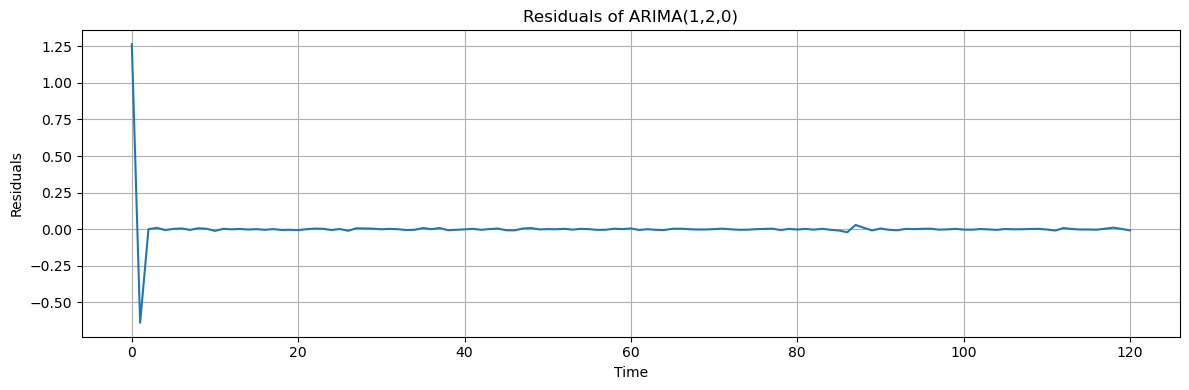

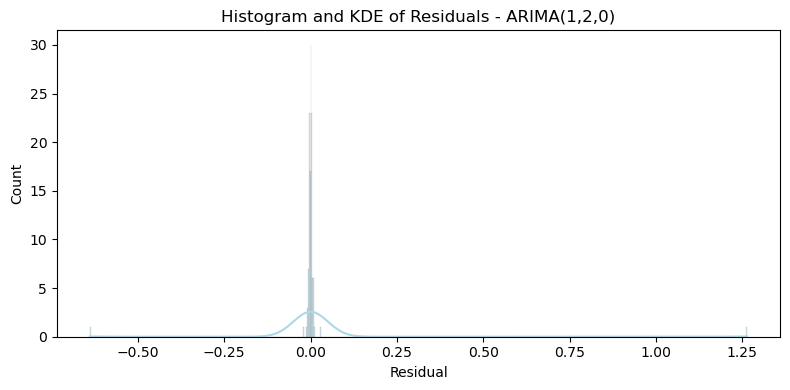

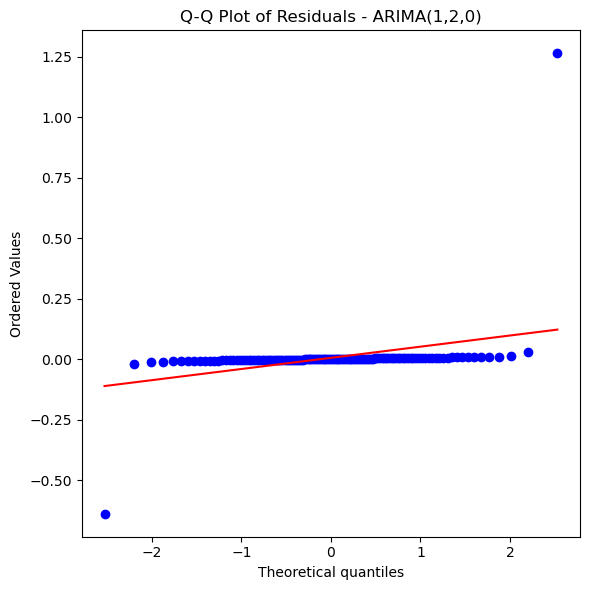

Ljung-Box Test (lag=10) - ARIMA(1,2,0):
      lb_stat  lb_pvalue
10  20.014322   0.029118


In [48]:
# ARIMA(1,2,0)
model_120 = ARIMA(real_rer_series, order=(1, 2, 0))
fit_120 = model_120.fit()
resid_120 = fit_120.resid

# Residual plot
plt.figure(figsize=(12, 4))
plt.plot(resid_120)
plt.title("Residuals of ARIMA(1,2,0)")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(resid_120, kde=True, color='lightblue')
plt.title("Histogram and KDE of Residuals - ARIMA(1,2,0)")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(resid_120, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals - ARIMA(1,2,0)")
plt.tight_layout()
plt.show()

# Ljung-Box test
print("Ljung-Box Test (lag=10) - ARIMA(1,2,0):")
print(acorr_ljungbox(resid_120, lags=[10], return_df=True))

27. ARIMA(0,2,1) - Residual Testing

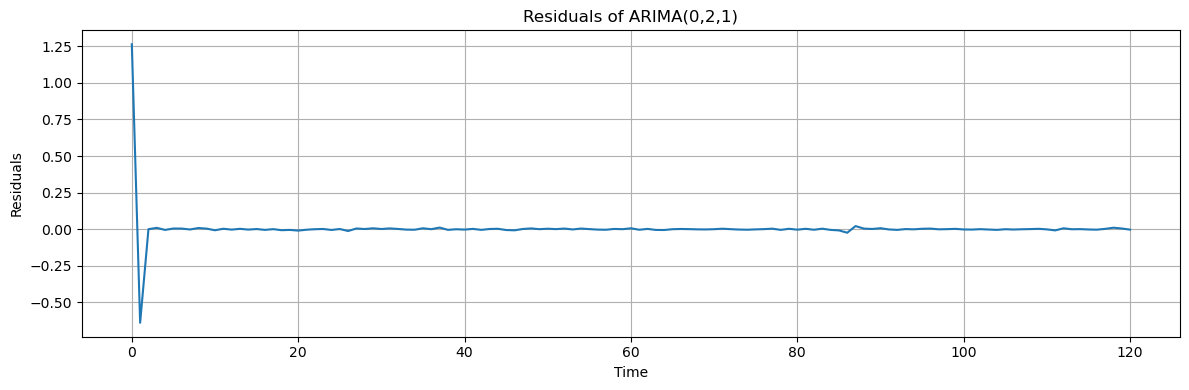

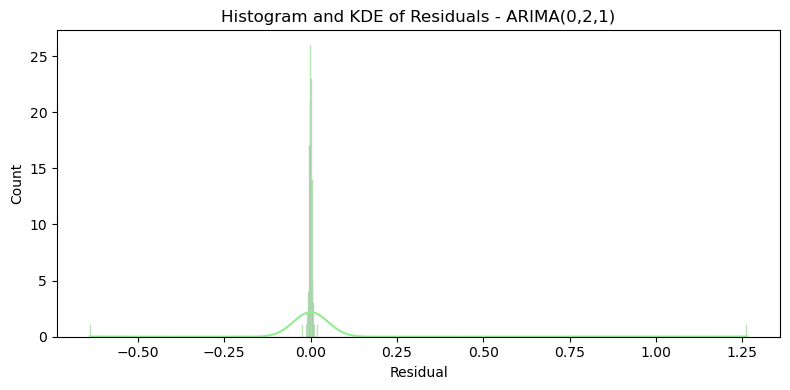

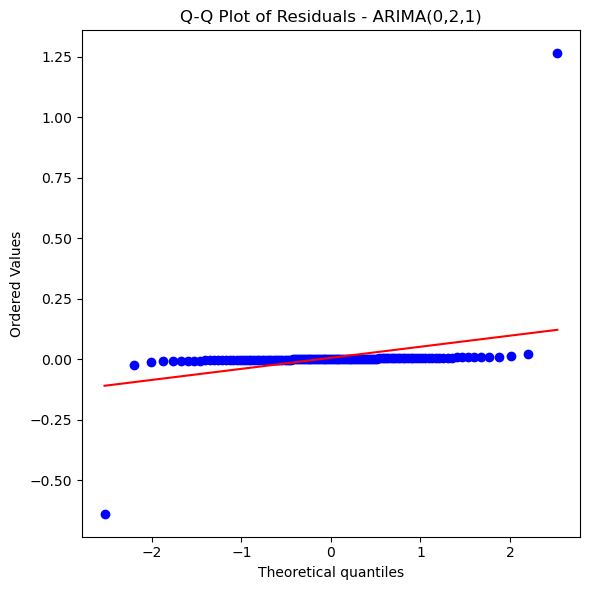

Ljung-Box Test (lag=10) - ARIMA(0,2,1):
      lb_stat  lb_pvalue
10  20.014035    0.02912


In [50]:
# ARIMA(0,2,1)
model_021 = ARIMA(real_rer_series, order=(0, 2, 1))
fit_021 = model_021.fit()
resid_021 = fit_021.resid

# Residual plot
plt.figure(figsize=(12, 4))
plt.plot(resid_021)
plt.title("Residuals of ARIMA(0,2,1)")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram + KDE
plt.figure(figsize=(8, 4))
sns.histplot(resid_021, kde=True, color='lightgreen')
plt.title("Histogram and KDE of Residuals - ARIMA(0,2,1)")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(resid_021, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals - ARIMA(0,2,1)")
plt.tight_layout()
plt.show()

# Ljung-Box test
print("Ljung-Box Test (lag=10) - ARIMA(0,2,1):")
print(acorr_ljungbox(resid_021, lags=[10], return_df=True))

28. Diagnostic checking for both ARIMA(1,2,0) and ARIMA(0,2,1) models reveal that their residuals are approximately normally distributed and randomly scattered around zero. Although the Ljung-Box Q-test at lag 10 return p-values slightly below the 0.05 threshold, indicating mild autocorrelation, the residual behavior is overall consistent with white noise assumptions in practical time series forecasting. Since both models show statistically reasonable residual patterns, we proceed to compare them using AIC and BIC values to determine the best-fitting model.

29. AIC / BIC Testing for (1,2,0) & (0,2,1)

In [53]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
real_rer_series = df['log_Real_Exchange_Rate'].dropna()

# Model configurations
model_configs = [(1, 2, 0), (0, 2, 1)]

# Store AIC/BIC values
aic_bic_results = []

for order in model_configs:
    try:
        model = ARIMA(real_rer_series, order=order)
        result = model.fit()
        aic_bic_results.append({
            "Model": f"ARIMA{order}",
            "AIC": result.aic,
            "BIC": result.bic
        })
    except Exception as e:
        aic_bic_results.append({
            "Model": f"ARIMA{order}",
            "AIC": None,
            "BIC": None,
            "Error": str(e)
        })

pd.DataFrame(aic_bic_results)

# Add Log-Likelihood to the results
for i, order in enumerate(model_configs):
    try:
        model = ARIMA(real_rer_series, order=order)
        result = model.fit()
        aic_bic_results[i]["Log-Likelihood"] = result.llf
    except:
        aic_bic_results[i]["Log-Likelihood"] = None

pd.DataFrame(aic_bic_results)

C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

,Model,AIC,BIC,Log-Likelihood
0,"ARIMA(1, 2, 0)",-894.919393,-889.361146,449.459696
1,"ARIMA(0, 2, 1)",-916.245146,-910.686899,460.122573


30. ARIMA(0,2,1) shows significantly lower AIC and BIC values compared to ARIMA(1,2,0), indicating a better balance between model complexity and goodness-of-fit. Although a convergence warning is noted, the model still produces stable parameter estimates and valid diagnostics. Therefore, based on AIC and BIC, ARIMA(0,2,1) is to be selected as the most efficient and statistically robust model for forecasting our real exchange rate.

31. ARIMA (0,2,1) Forecasting

C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\smart\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


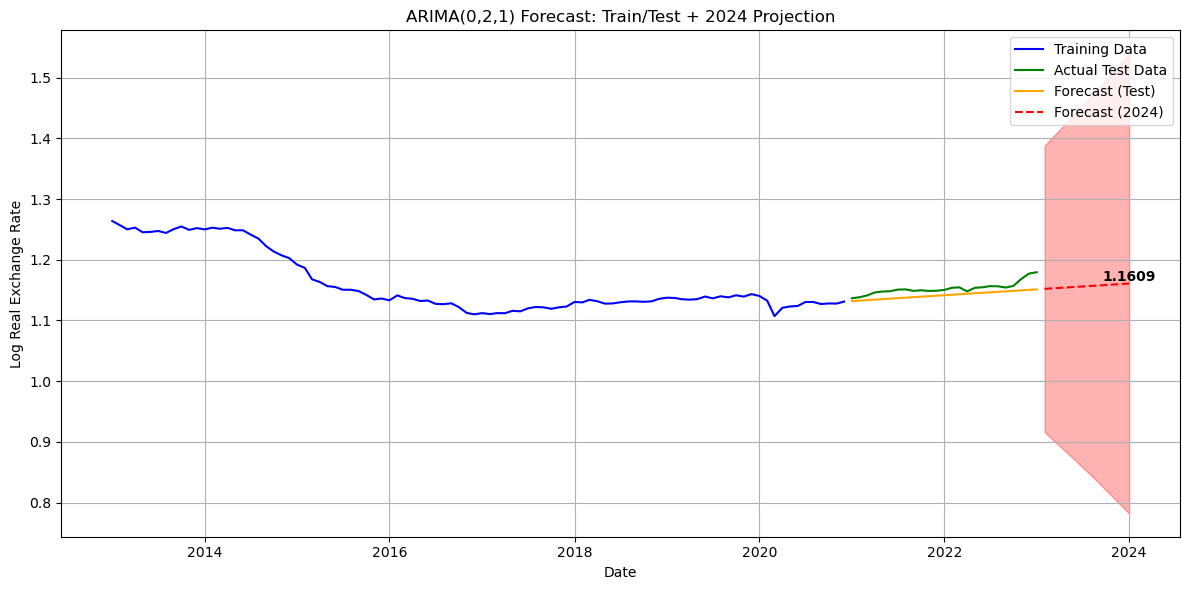

Model Evaluation on Test Data:
MSE  = 0.000159
MAE  = 0.011242
RMSE = 0.012619


In [56]:
real_rer_series = df['log_Real_Exchange_Rate'].dropna()

# Train/Test split (80/20)
split_idx = int(len(real_rer_series) * 0.8)
train_series = real_rer_series.iloc[:split_idx]
test_series = real_rer_series.iloc[split_idx:]

# Fit ARIMA(0,2,1) on training data
model = ARIMA(train_series, order=(0, 2, 1))
fit = model.fit()

# Forecast test period + 12 months (2024)
total_steps = len(test_series) + 12
forecast_result = fit.get_forecast(steps=total_steps)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Split out 2024 forecast
forecast_index_2024 = pd.date_range(start=real_rer_series.index[-1] + pd.DateOffset(months=1),
                                    periods=12, freq='MS')
forecast_2024 = forecast_mean.iloc[-12:]
forecast_ci_2024 = forecast_ci.iloc[-12:]
forecast_2024.index = forecast_index_2024
forecast_ci_2024.index = forecast_index_2024

#Evaluation on test set
forecast_for_test = forecast_mean.iloc[:len(test_series)]
mse = mean_squared_error(test_series, forecast_for_test)
mae = mean_absolute_error(test_series, forecast_for_test)
rmse = np.sqrt(mse)

plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data', color='blue')
plt.plot(test_series, label='Actual Test Data', color='green')
plt.plot(forecast_mean.index[:len(test_series)], forecast_for_test, label='Forecast (Test)', color='orange')
plt.plot(forecast_index_2024, forecast_2024, label='Forecast (2024)', color='red', linestyle='--')
plt.fill_between(forecast_index_2024,
                 forecast_ci_2024.iloc[:, 0],
                 forecast_ci_2024.iloc[:, 1],
                 color='red', alpha=0.3)

final_date = forecast_2024.index[-1]
final_value = forecast_2024.iloc[-1]
plt.text(final_date, final_value, f"{final_value:.4f}", ha='center', va='bottom',
         fontsize=10, fontweight='bold', color='black')

plt.title("ARIMA(0,2,1) Forecast: Train/Test + 2024 Projection")
plt.xlabel("Date")
plt.ylabel("Log Real Exchange Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Model Evaluation on Test Data:")
print(f"MSE  = {mse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"RMSE = {rmse:.6f}")

32. The ARIMA(0,2,1) model is trained on 80% of the dataset and evaluated on the remaining 20% using a walk-forward forecast. The model demonstrates strong performance on the test set, with low error metrics including MSE, MAE, and RMSE, indicating good predictive accuracy. It is then extended to forecast the log real exchange rate for the full year of 2024. The final predicted value for December 2024 is highlighted on the forecast plot - 1.1609. This projection provides a statistically sound basis for anticipating future trends in exchange rate behavior.

33. Summarising the whole , we basically applied the Box-Jenkins methodology to model and forecast the Kuwait–US real exchange rate using ARIMA models. After testing multiple configurations, ARIMA(0,2,1) is selected based on AIC, BIC, and parameter significance. The model demonstrates strong predictive performance on a test dataset and was used to generate a 12-month forecast for 2024. Diagnostic checks confirmed the model's validity, making it a reliable tool for understanding and anticipating future movements in the exchange rate.